In [3]:
import numpy as np
import pandas as pd
import os
from prophet import Prophet

In [5]:
path = "./BTC-USD.csv"
df = pd.read_csv(path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3500,2024-04-17,63831.847656,64486.363281,59768.585938,61276.691406,61276.691406,41915247049
3501,2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,63512.753906,36006307335
3502,2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,63843.570312,49920425401
3503,2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,64994.441406,23097485495


In [6]:
df = df[['Date','Close']]

In [7]:
df

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3500,2024-04-17,61276.691406
3501,2024-04-18,63512.753906
3502,2024-04-19,63843.570312
3503,2024-04-20,64994.441406


In [8]:
df.columns = ['ds','y']
df.head(3)

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990


In [9]:
model = Prophet()
model.fit(df)

16:08:30 - cmdstanpy - INFO - Chain [1] start processing
16:08:30 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = model.make_future_dataframe(1)

In [30]:
guess = model.predict(future)
guess

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,171.428312,-9755.327043,4345.677817,171.428312,171.428312,-2944.481601,-2944.481601,-2944.481601,44.778365,44.778365,44.778365,-2989.259966,-2989.259966,-2989.259966,0.0,0.0,0.0,-2773.053289
1,2014-09-18,171.660469,-9930.145881,4603.894776,171.660469,171.660469,-3036.299816,-3036.299816,-3036.299816,-11.550482,-11.550482,-11.550482,-3024.749334,-3024.749334,-3024.749334,0.0,0.0,0.0,-2864.639347
2,2014-09-19,171.892626,-10399.028917,4160.094298,171.892626,171.892626,-3070.692536,-3070.692536,-3070.692536,-11.428461,-11.428461,-11.428461,-3059.264074,-3059.264074,-3059.264074,0.0,0.0,0.0,-2898.799910
3,2014-09-20,172.124783,-9500.412291,4594.054792,172.124783,172.124783,-3104.364678,-3104.364678,-3104.364678,-11.847810,-11.847810,-11.847810,-3092.516868,-3092.516868,-3092.516868,0.0,0.0,0.0,-2932.239896
4,2014-09-21,172.356939,-10626.577923,3720.024314,172.356939,172.356939,-3121.539203,-3121.539203,-3121.539203,2.586828,2.586828,2.586828,-3124.126031,-3124.126031,-3124.126031,0.0,0.0,0.0,-2949.182263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,2024-04-18,44143.840190,41215.478469,55835.180409,44143.840190,44143.840190,4080.675159,4080.675159,4080.675159,-11.550482,-11.550482,-11.550482,4092.225641,4092.225641,4092.225641,0.0,0.0,0.0,48224.515349
3502,2024-04-19,44178.352877,41289.953110,55472.323047,44178.352877,44178.352877,3960.579839,3960.579839,3960.579839,-11.428461,-11.428461,-11.428461,3972.008300,3972.008300,3972.008300,0.0,0.0,0.0,48138.932716
3503,2024-04-20,44212.865564,40466.382694,55095.543908,44212.865564,44212.865564,3839.625913,3839.625913,3839.625913,-11.847810,-11.847810,-11.847810,3851.473724,3851.473724,3851.473724,0.0,0.0,0.0,48052.491477
3504,2024-04-21,44247.378250,40414.496841,55447.797543,44247.378250,44247.378250,3733.584414,3733.584414,3733.584414,2.586828,2.586828,2.586828,3730.997586,3730.997586,3730.997586,0.0,0.0,0.0,47980.962664


C:\Users\Administrator\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Administrator\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


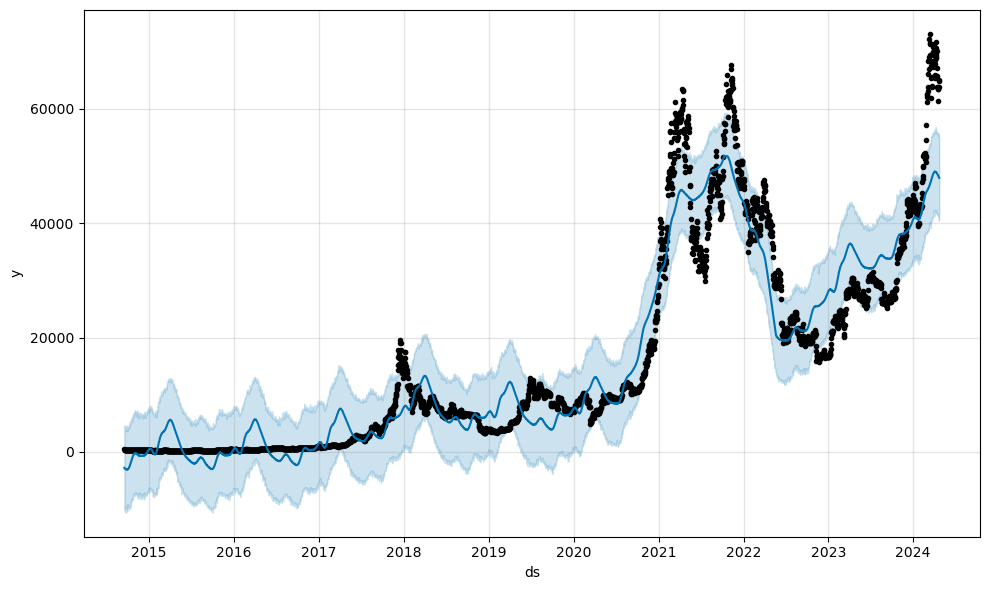

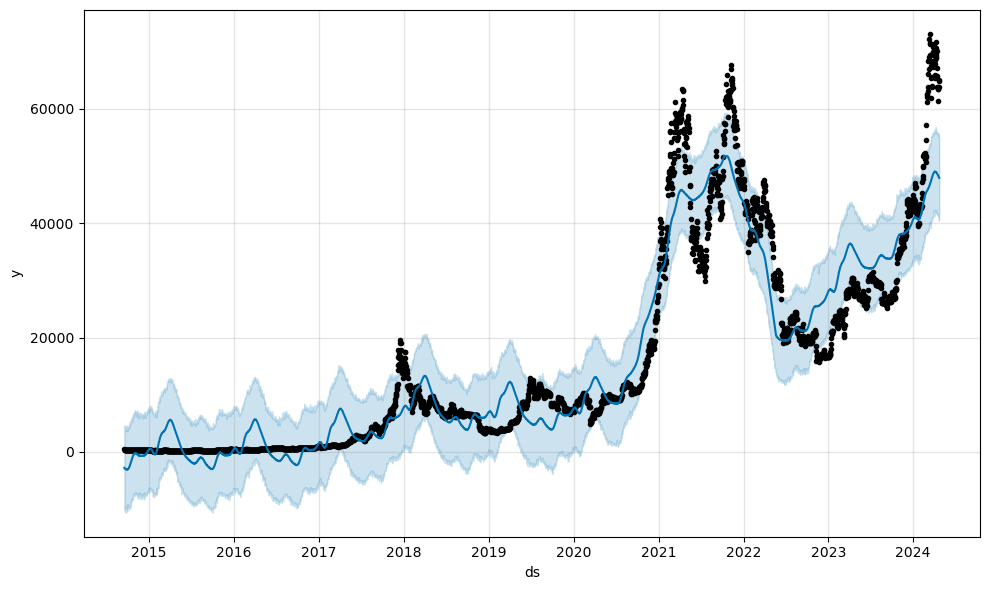

In [31]:
model.plot(guess)

C:\Users\Administrator\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Administrator\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Administrator\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain th

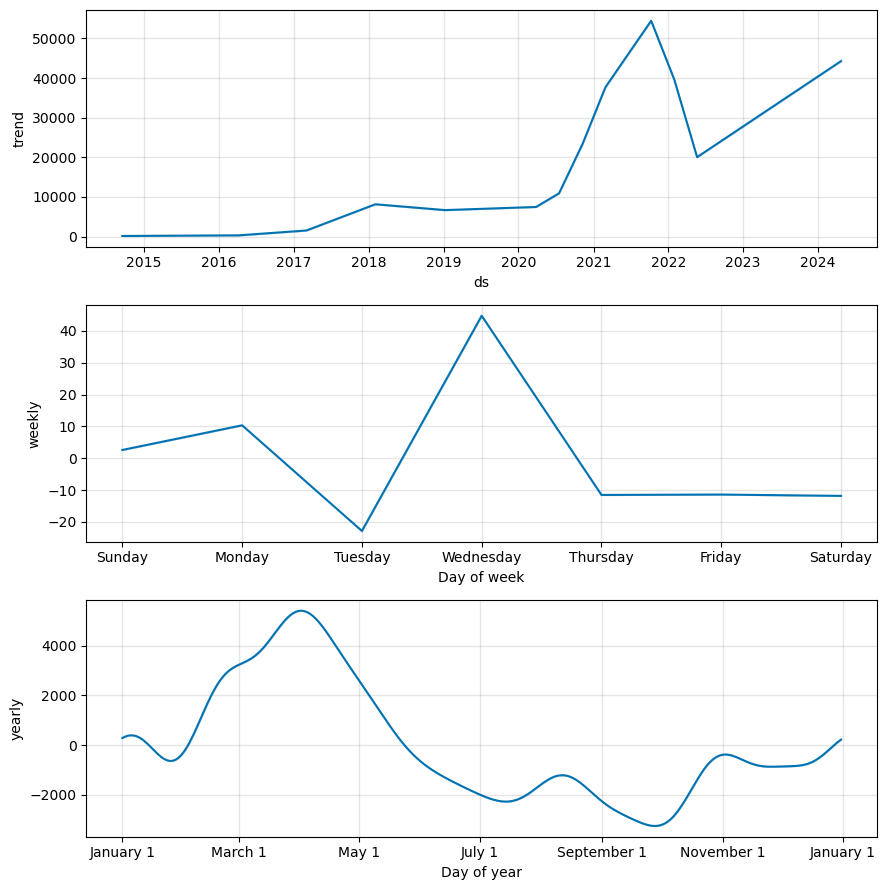

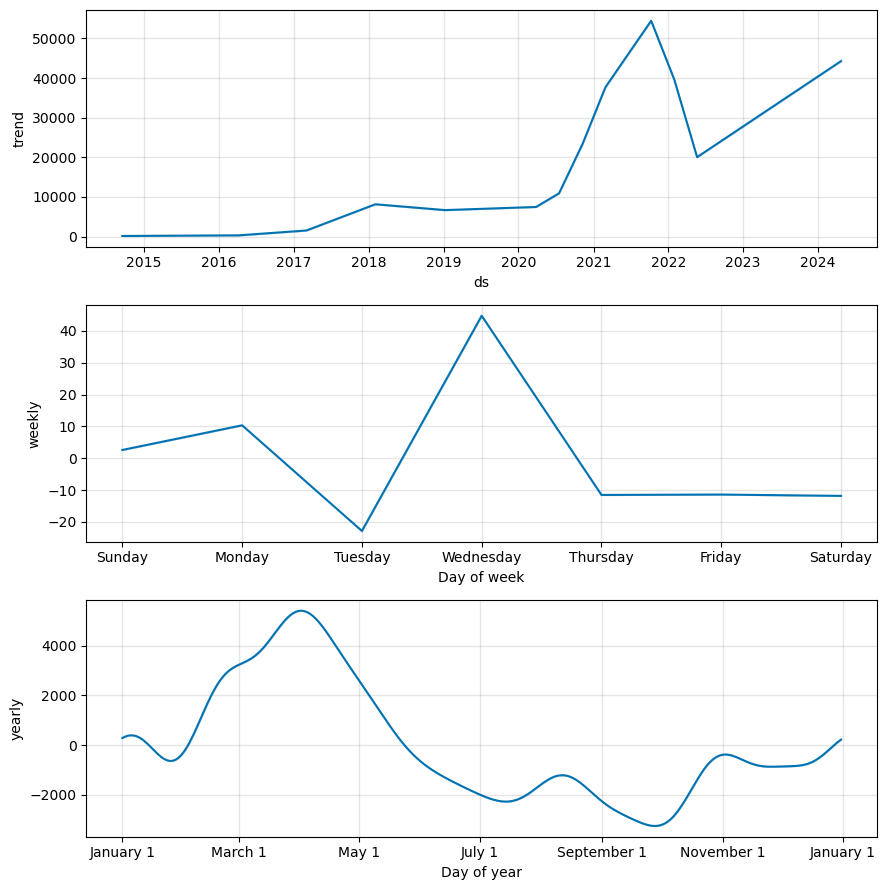

In [32]:
model.plot_components(guess)